<a href="https://colab.research.google.com/github/hadjerseddik/Crop_classification/blob/main/Train/PlantVillageDataSet/Test_experiments/plantVillageXception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Xception model**


# Calling dependencies

In [ ]:
import tensorflow as tf
print(tf.__version__)
 
from tensorflow.keras.applications.xception import Xception,preprocess_input
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, AveragePooling2D, GlobalAveragePooling2D, Input, Flatten, Dropout
from tensorflow.keras.models import Model,load_model
 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from tensorflow.keras.optimizers import SGD
from tensorflow.keras import optimizers

from tensorflow.keras.utils import plot_model
from tensorflow.keras import models
 
import datetime
import numpy as np
import glob
import os
import pandas as pd

2.5.0


**Connect to drive and mount it to the runtime**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Copy the dataset to runtime**

In [ ]:
!cp '/content/drive/MyDrive/shared dataset platVillage/PlantVillage.tar.gz' 'PlantVillage.tar.gz'

**Extract the plantVillage.zip to runtime**

In [ ]:
!tar -xf PlantVillage.tar.gz

***Prepare our dataframe ***

 to explore the data we have two options :
1- split the dataset and pass it to Generators 
2- pass to dataframe to organise better the data in form of lists split it and pass it to generators 

in our case the dataset is already devided to train and val so no need to split 




In [ ]:


trainPath = '/content/PlantVillage/train'
lists = os.listdir(trainPath)
labels = []
file_lst = []

for folder in lists:
    files = os.listdir(trainPath +"/"+folder)
    if(folder != 'background'):   
      files = [folder+'/'+file  for file in files]
      file_lst.extend(files)
      labels.extend([folder.split(sep='___')[0] for i in range(len(files))])
#print(len(file_lst))
#print(len(labels))
train_df = pd.DataFrame(list(zip(file_lst,labels)),columns =["path","label"])
print(train_df)


                                                    path      label
0      Raspberry___healthy/6859f761-111e-40d6-aaf2-31...  Raspberry
1      Raspberry___healthy/7da82159-e6d3-4166-ab03-f2...  Raspberry
2      Raspberry___healthy/9efc34db-3437-4ba6-b989-70...  Raspberry
3      Raspberry___healthy/1e954b37-9988-4554-bb78-d7...  Raspberry
4      Raspberry___healthy/4ad8532d-57cd-41b7-af50-c6...  Raspberry
...                                                  ...        ...
43439  Grape___Black_rot/b827f370-606b-4430-b3e0-aa12...      Grape
43440  Grape___Black_rot/914632e9-3cfb-4879-bafc-9e66...      Grape
43441  Grape___Black_rot/e441a2b0-1428-43b4-bbfc-a938...      Grape
43442  Grape___Black_rot/e2ba53f3-404c-442e-88e6-5a72...      Grape
43443  Grape___Black_rot/cb713b4e-1e13-4d9b-865a-67aa...      Grape

[43444 rows x 2 columns]


In [ ]:
validationPath = '/content/PlantVillage/val'
lists = os.listdir(validationPath)
labels = []
file_lst = []

for folder in lists:
    files = os.listdir(validationPath +"/"+folder)
    if(folder != 'background'): 
      files = [folder+'/'+file  for file in files]
      file_lst.extend(files)
      labels.extend([folder.split(sep='___')[0] for i in range(len(files))])
    

validation_df = pd.DataFrame(list(zip(file_lst,labels)),columns =["path","label"])
print(validation_df)


                                                    path      label
0      Raspberry___healthy/3734da4f-b4d3-4457-b73e-1d...  Raspberry
1      Raspberry___healthy/ead8c507-c422-43d2-8efe-85...  Raspberry
2      Raspberry___healthy/bc82bae8-9be5-4035-afd4-35...  Raspberry
3      Raspberry___healthy/ce22675d-02b8-4fbb-a5bb-3f...  Raspberry
4      Raspberry___healthy/b8a96dea-8442-4855-9fdf-c2...  Raspberry
...                                                  ...        ...
10856  Grape___Black_rot/485c3608-0e75-4c55-acae-65b5...      Grape
10857  Grape___Black_rot/00cff577-afd4-4e36-ac9c-a52a...      Grape
10858  Grape___Black_rot/11d33215-d6b5-4a54-b41f-a6af...      Grape
10859  Grape___Black_rot/40f8f9da-fb45-4cde-b969-3ef1...      Grape
10860  Grape___Black_rot/26164e5c-d4d9-469c-a182-e43a...      Grape

[10861 rows x 2 columns]


**Generators**

The generator will run through image data and apply random transformations to each individual image as it is passed to the model so that it never sees the exact same image twice during training

In [ ]:
batch_size = 32
image_size=(224,224)
nb_epoch = 15

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
                  dataframe=train_df,
                  x_col="path",
                  y_col="label",
                  directory= '/content/PlantVillage/train/',
                  target_size=image_size,
                  batch_size=batch_size
                  )

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
                  dataframe=validation_df,
                  x_col="path",
                  y_col="label",
                  directory= '/content/PlantVillage/val/',
                  target_size=image_size,
                  batch_size=batch_size
                  ) 

Found 43444 validated image filenames belonging to 14 classes.
Found 10861 validated image filenames belonging to 14 classes.


In [ ]:
print(train_generator.class_indices)

{'Apple': 0, 'Blueberry': 1, 'Cherry_(including_sour)': 2, 'Corn_(maize)': 3, 'Grape': 4, 'Orange': 5, 'Peach': 6, 'Pepper,_bell': 7, 'Potato': 8, 'Raspberry': 9, 'Soybean': 10, 'Squash': 11, 'Strawberry': 12, 'Tomato': 13}


# **BUILD MODEL XCEPTION**

Options changed :

1- Xception Lib 

2- input_shape
_______________________________________

*include_top*: freeze the top layers is important for fine-tuning

then create new model on top to train our new data




In [ ]:
class_number = 14
def build_model_graph(class_number=class_number):
  base_model= Xception(include_top=False,weights='imagenet',input_shape=(299, 299, 3))
  x= base_model.output
  x= GlobalAveragePooling2D()(x)
  x= Dropout(0.3)(x)
  x= Dense(256,activation='relu')(x)
  predictions = Dense(class_number,activation='softmax')(x)
  model=Model(base_model.input,predictions)

  return model 

In [ ]:
model = build_model_graph()
print(model.summary())

**Plot the model architecture**

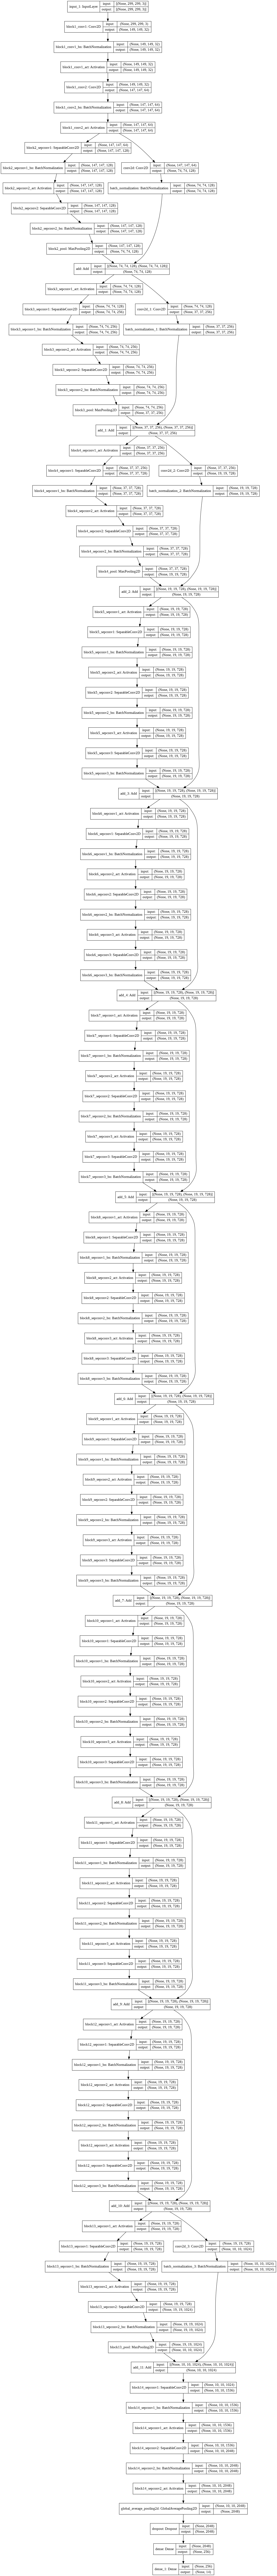

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

# **Model compiling & fitting**

In [ ]:

model.compile(optimizer=optimizers.SGD(learning_rate=1e-3, momentum=0.9), 
              loss='categorical_crossentropy' ,
              metrics = ['accuracy']
              )

In [ ]:
hist=model.fit(train_generator,
          epochs=nb_epoch,
          validation_data=validation_generator
         ) 

Epoch 1/15
1358/1358 [==============================] - 905s 639ms/step - loss: 0.4718 - accuracy: 0.8673 - val_loss: 0.0349 - val_accuracy: 0.9907
Epoch 2/15
1358/1358 [==============================] - 873s 643ms/step - loss: 0.0371 - accuracy: 0.9909 - val_loss: 0.0151 - val_accuracy: 0.9958
Epoch 3/15
1358/1358 [==============================] - 873s 643ms/step - loss: 0.0184 - accuracy: 0.9953 - val_loss: 0.0114 - val_accuracy: 0.9967
Epoch 4/15
1358/1358 [==============================] - 875s 644ms/step - loss: 0.0119 - accuracy: 0.9973 - val_loss: 0.0094 - val_accuracy: 0.9974
Epoch 5/15
1358/1358 [==============================] - 876s 645ms/step - loss: 0.0085 - accuracy: 0.9983 - val_loss: 0.0072 - val_accuracy: 0.9978
Epoch 6/15
1358/1358 [==============================] - 873s 643ms/step - loss: 0.0069 - accuracy: 0.9983 - val_loss: 0.0071 - val_accuracy: 0.9976
Epoch 7/15
1358/1358 [==============================] - 873s 643ms/step - loss: 0.0055 - accuracy: 0.9986 - val_

# **Save the model and the history of the model**

In [ ]:
XceptionArch = '/content/drive/MyDrive/Plant classification/Results/PlantVillageDataSet/xceptionArch'
os.mkdir(XceptionArch) 

In [ ]:
target_dir = '/content/drive/MyDrive/Plant classification/Results/PlantVillageDataSet/xceptionArch'
architecture_name = "XceptionArch"
#ct = str(datetime.datetime.now())
model.save(target_dir+'/'+architecture_name+'.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


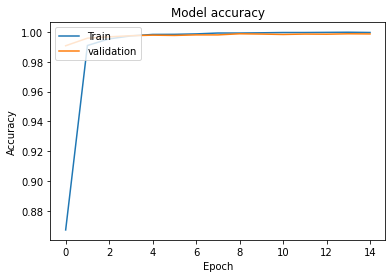

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show() 

In [ ]:
hist = pd.DataFrame(hist.history) 

In [ ]:
hist_csv_file = '/content/drive/MyDrive/Plant classification/Results/PlantVillageDataSet/xceptionArch/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist.to_csv(f)